In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Mohit Lahoti/Downloads/Compressed/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Drop irrelevant columns
df.drop(columns=['Loan_ID'], inplace=True)

In [11]:
df.shape

(614, 12)

In [12]:
# Handle missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [13]:
#checking again for the null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
df['Dependents'] = df['Dependents'].replace('3+', 4)

In [16]:
df['Dependents'] = df['Dependents'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


<Axes: >

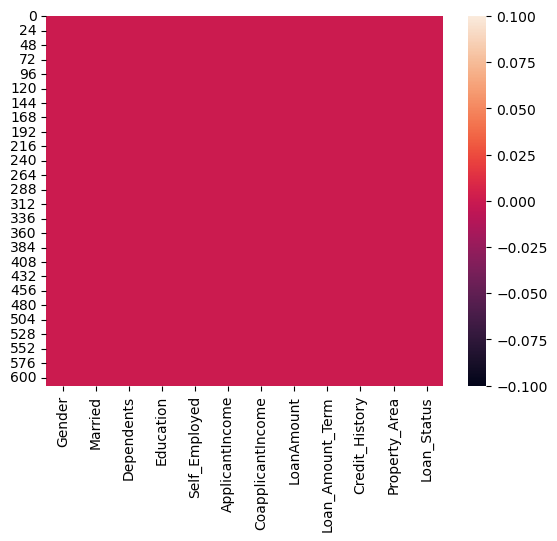

In [19]:
#check null value by using heatmap
sns.heatmap(df.isnull())

In [20]:
#cheking no.of unique values in each column
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [21]:
# checking the value counts of each column
for col in df.columns:
    print(df[col].value_counts())
    print('\n')

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amoun

In [22]:
# Checking for duplicate values
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [25]:
# Separating categorical and numerical columns
numerical_cols =['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',]
num_df = df[numerical_cols]
numerical_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [26]:
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area']
cat_df = df[categorical_cols]
categorical_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [27]:
# Getting statistical summary of numerical columns
desc = df.describe()
desc

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.827362,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.212833,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


Univarient analysis

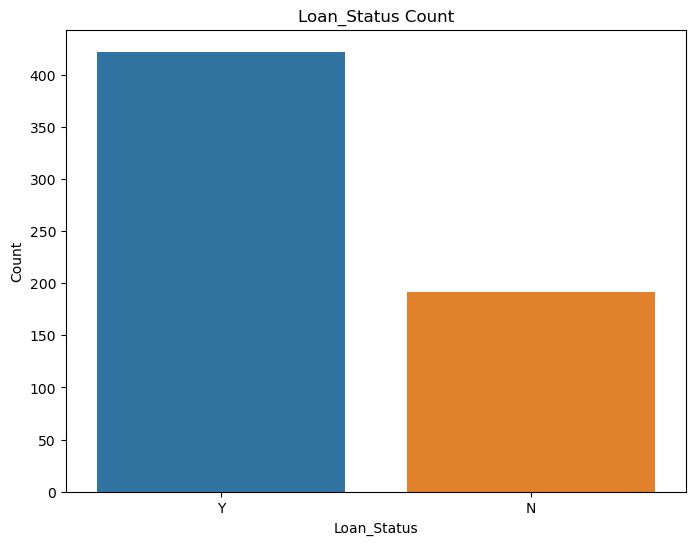

In [28]:
# Let's focus on the 'Loan_Status' column, which is our target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan_Status Count')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

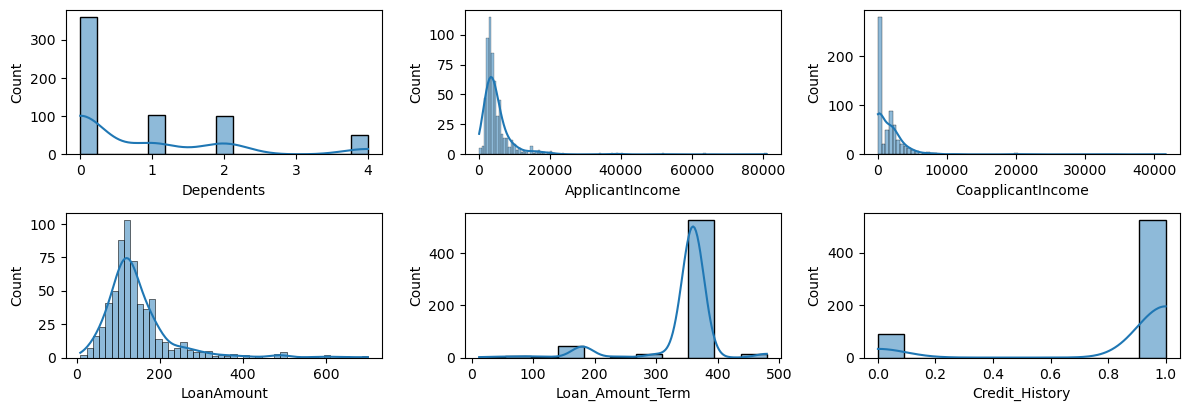

In [29]:
# for numerical columns
plt.figure(figsize=(12, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(9, 3, i)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

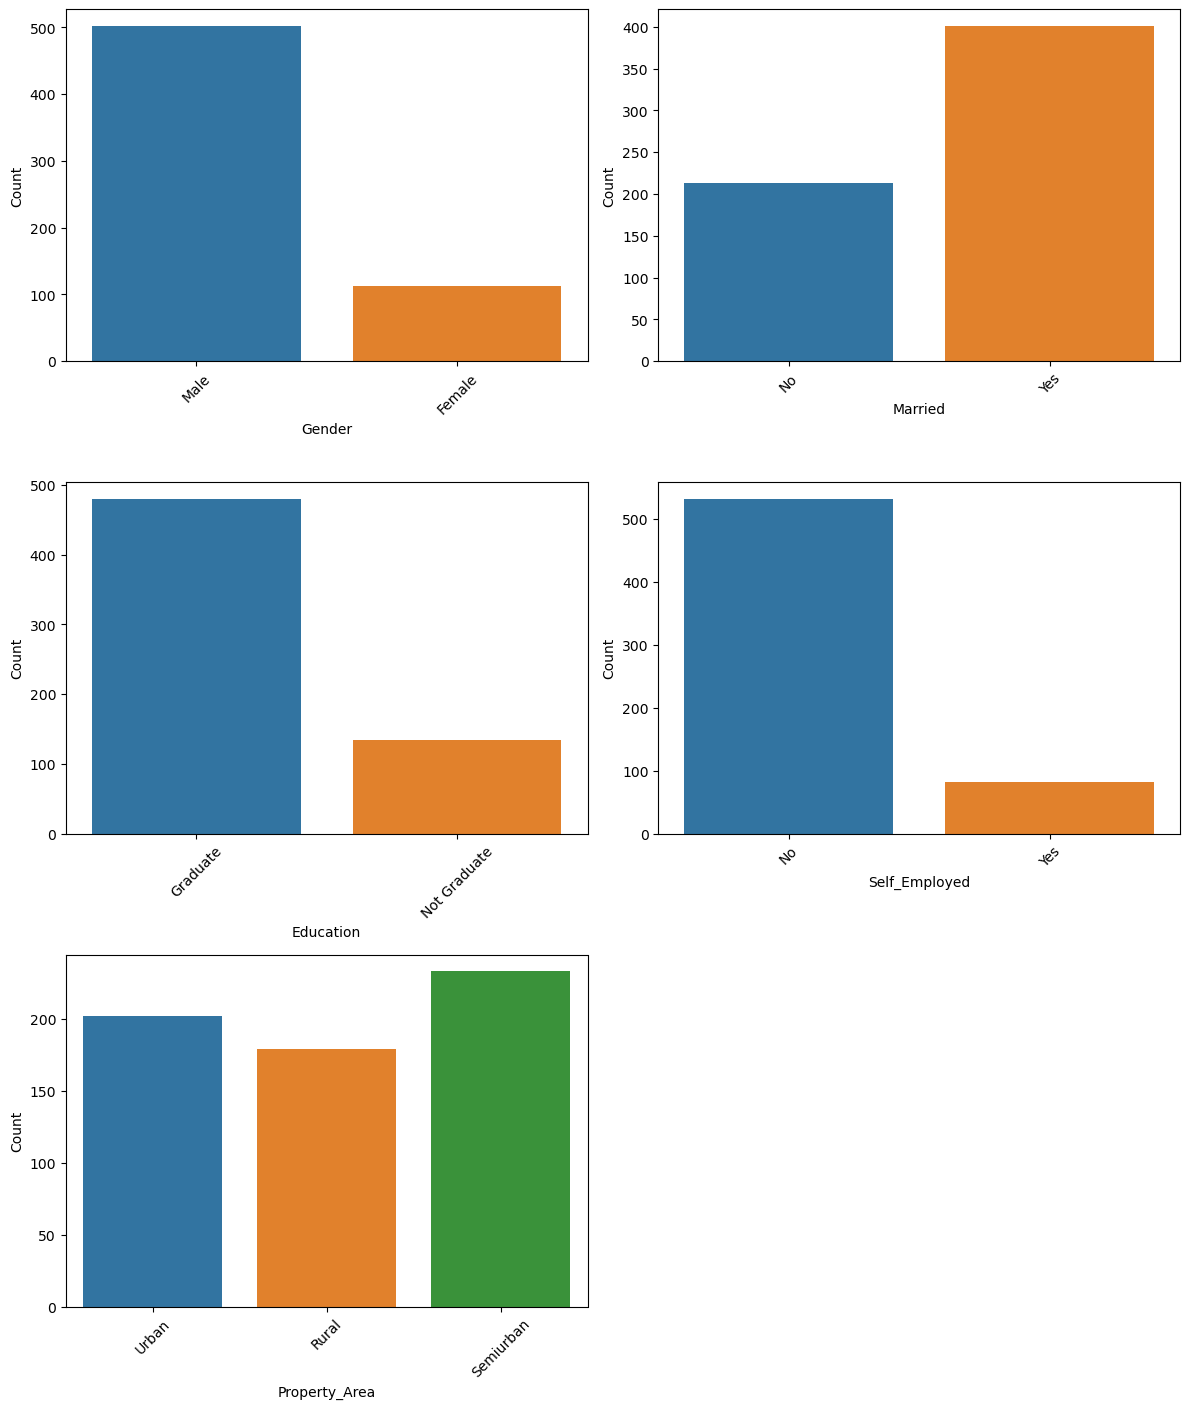

In [30]:
# for categorical columns
plt.figure(figsize=(12, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bivariate Analysis

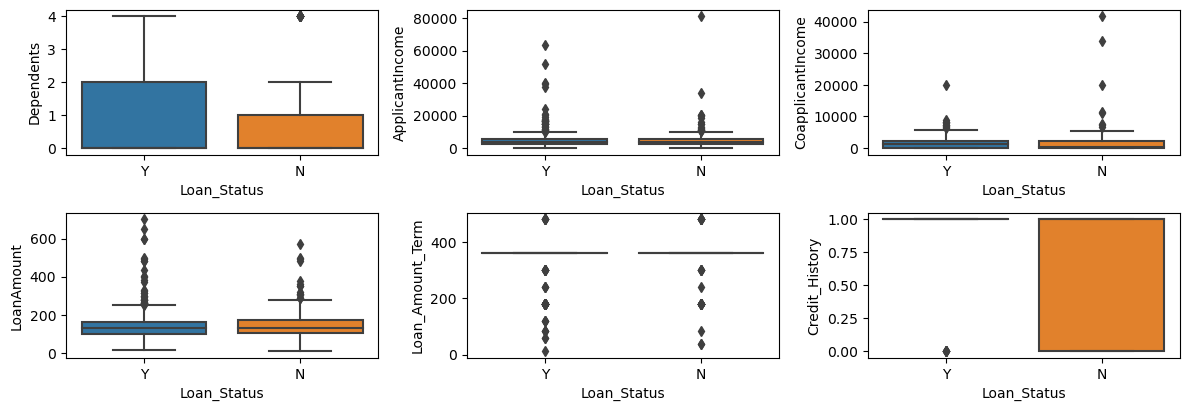

In [31]:
# Relationship between attrition and numerical columns
plt.figure(figsize=(12, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(9, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.xlabel('Loan_Status')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

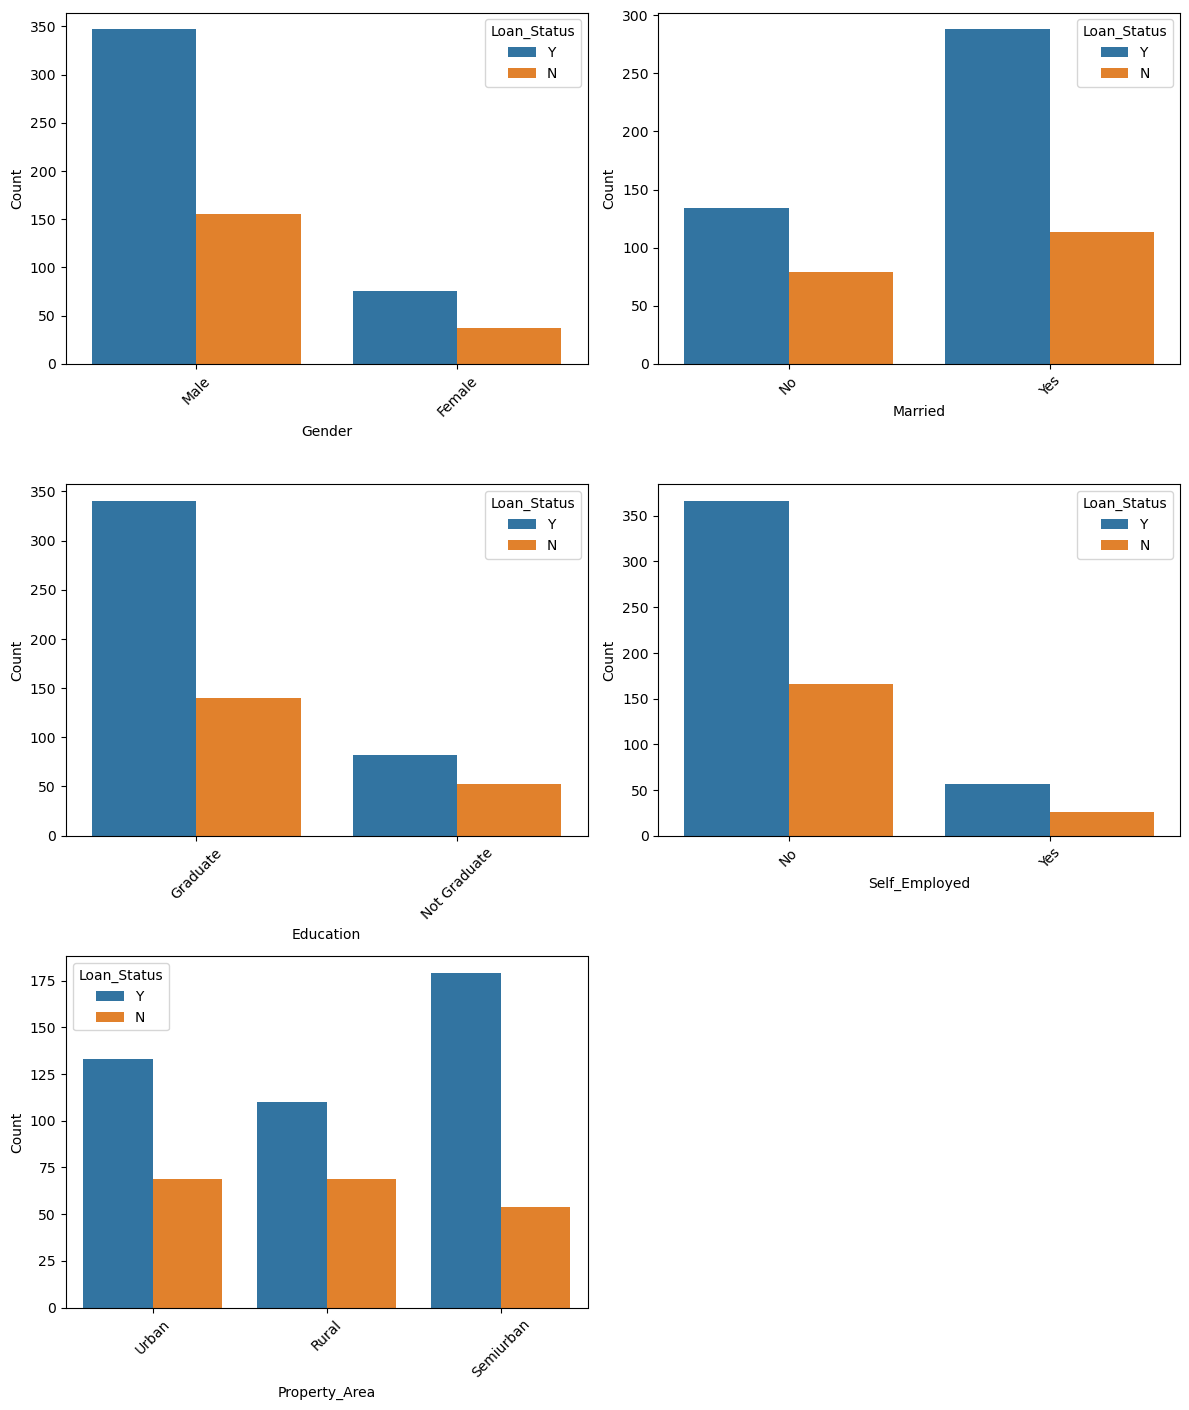

In [32]:
# Relationship between attrition and categorical columns
plt.figure(figsize=(12, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Multivariate Analysis

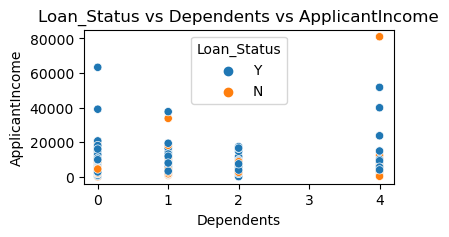

In [33]:
# Relationship between Loan_Status, Dependents, and ApplicantIncome
plt.figure(figsize=(4, 2))
sns.scatterplot(x='Dependents', y='ApplicantIncome', hue='Loan_Status', data=df)
plt.xlabel('Dependents')
plt.ylabel('ApplicantIncome')
plt.title('Loan_Status vs Dependents vs ApplicantIncome')
plt.show()

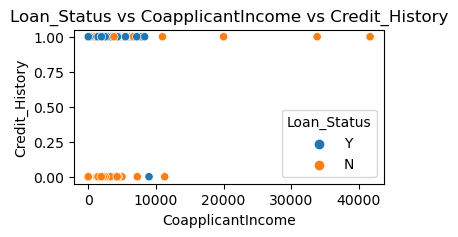

In [34]:
# Relationship between Loan_Status, CoapplicantIncome, and Credit_History
plt.figure(figsize=(4, 2))
sns.scatterplot(x='CoapplicantIncome', y='Credit_History', hue='Loan_Status', data=df)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Credit_History')
plt.title('Loan_Status vs CoapplicantIncome vs Credit_History')
plt.show()

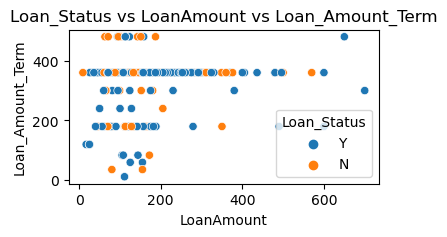

In [35]:
# Relationship between Loan_Status, LoanAmount, and Loan_Amount_Term
plt.figure(figsize=(4, 2))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', data=df)
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.title('Loan_Status vs LoanAmount vs Loan_Amount_Term')
plt.show()

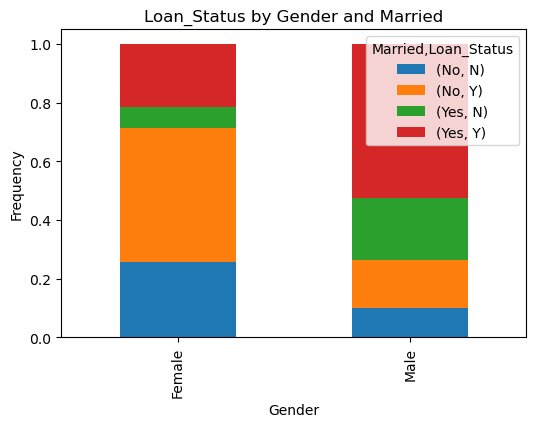

In [38]:
# Relationship between Loan_Status, Gender, and Married
# Create a crosstab to calculate the frequencies
cross_table = pd.crosstab(index=df['Gender'], columns=[df['Married'], df['Loan_Status']], normalize='index')
cross_table.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Loan_Status by Gender and Married')
plt.show()

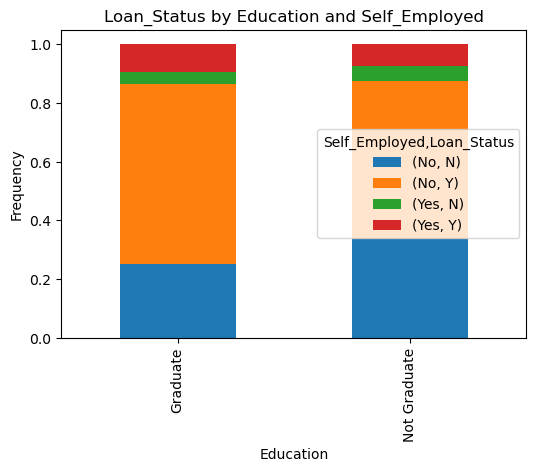

In [39]:
# Relationship between Loan_Status, Education, and Self_Employed
# Create a crosstab to calculate the frequencies
cross_table = pd.crosstab(index=df['Education'], columns=[df['Self_Employed'], df['Loan_Status']], normalize='index')
cross_table.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Loan_Status by Education and Self_Employed')
plt.show()

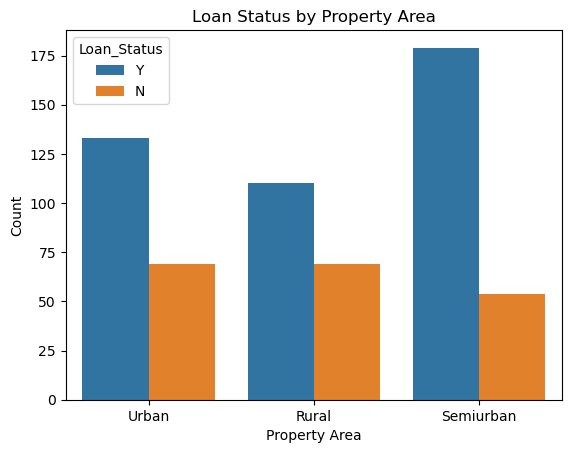

In [40]:
# Relationship between Loan_Status, and Property_Area
# Create a countplot
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Loan Status by Property Area')
plt.show()

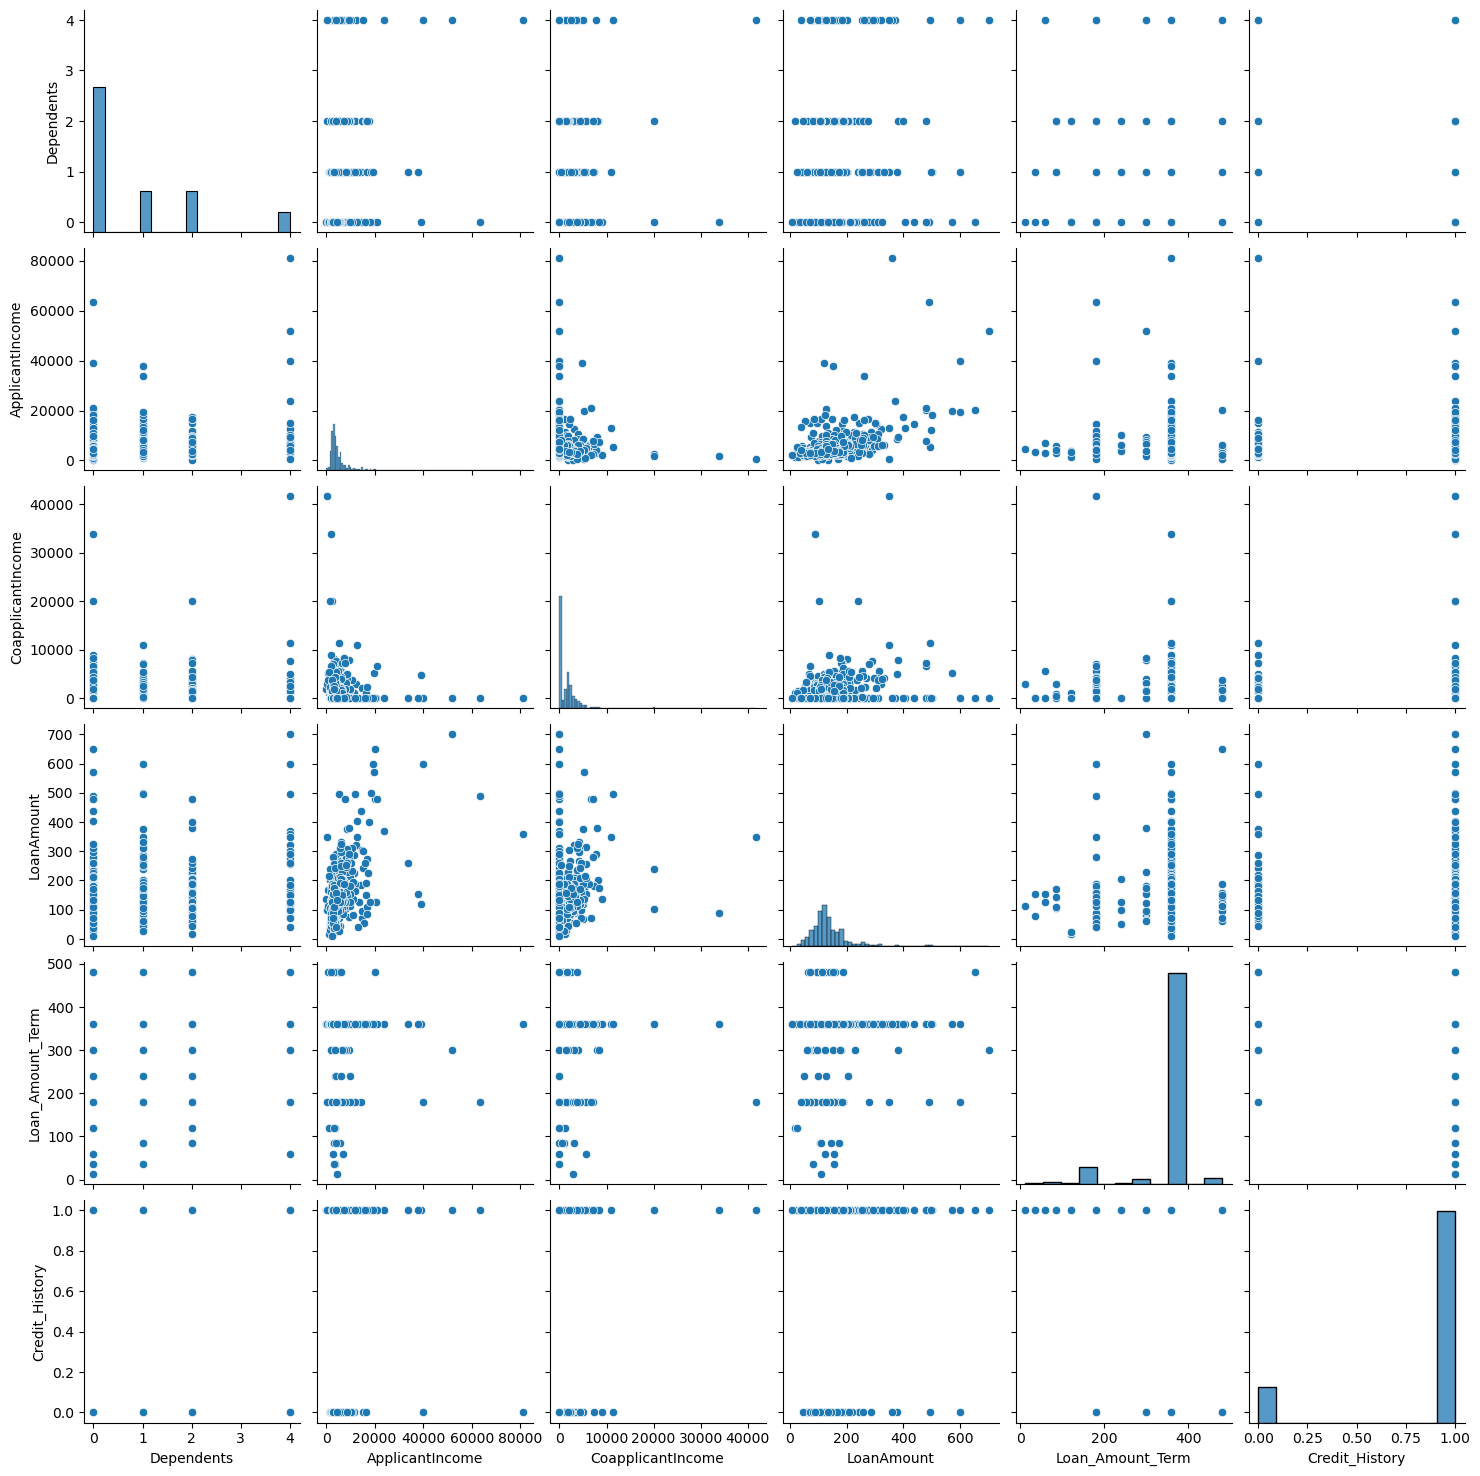

In [42]:
# Create the pairplot
sns.pairplot(df[numerical_cols], diag_kind='hist')
plt.show()

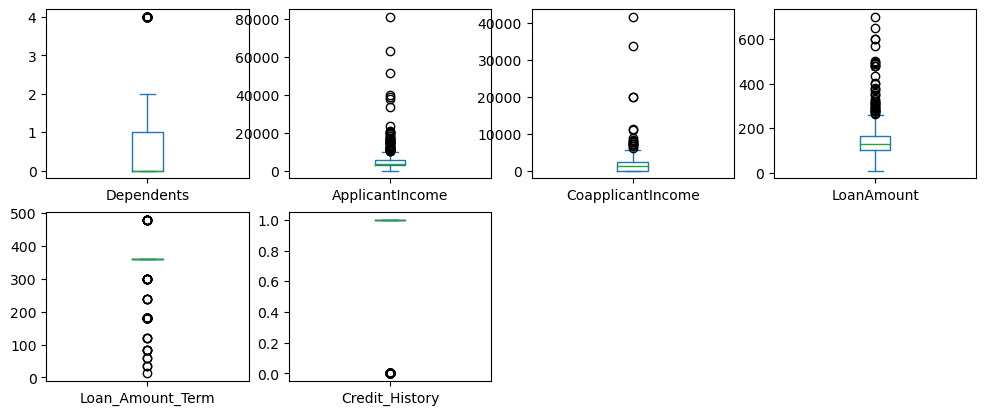

In [43]:
df_outliers = df[numerical_cols]
df_outliers.plot(kind='box', subplots=True, layout=(7, 4), fontsize=10, figsize=(12, 18))
plt.show()

In [44]:
#remove outliers with z-score method
from scipy.stats import zscore
out_df = df[numerical_cols]
z = np.abs(zscore(out_df))
z

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.682729,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.142459,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.682729,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.682729,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.682729,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...,...
609,0.682729,0.410130,0.554487,0.889500,0.273231,0.411733
610,2.618024,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.142459,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.967648,0.357064,0.554487,0.490816,0.273231,0.411733


In [45]:
#threshold value = 3
z_score_threshold = 3

In [46]:
outliers = np.any(z > z_score_threshold, axis=1)

In [47]:
df1 = df[~outliers]

In [48]:
df1.shape

(577, 12)

In [49]:
#shape of old and new data frame
print("old df_",df.shape[0])
print("New df_",df1.shape[0])

old df_ 614
New df_ 577


In [50]:
#view data loss by persentage 
print("data loss percentage_",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage_ 6.026058631921824


In [51]:
df=df1

In [52]:
# check skewness 
df.skew()

Dependents           1.500252
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

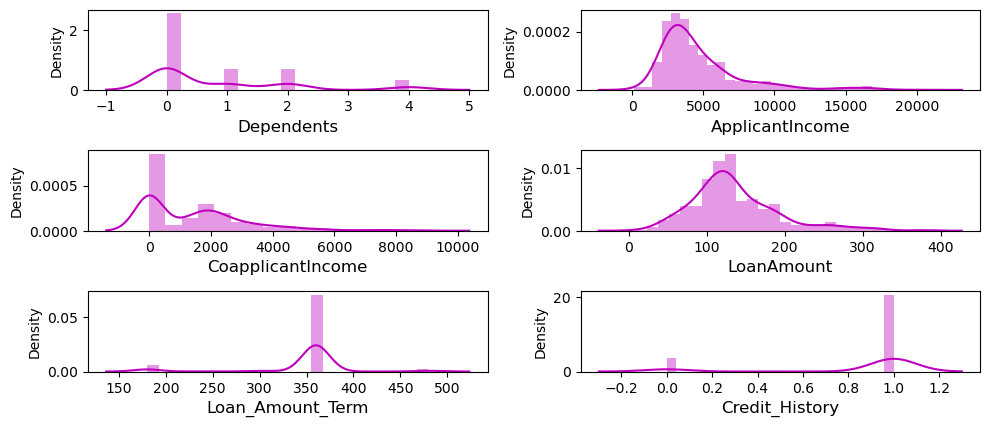

In [53]:
#lets check how the data hase been distributed in numerical columns
plt.figure(figsize=(10, 18))  
plotnumber = 1
for col in numerical_cols:
    if plotnumber <= 26:
        plt.subplot(13, 2, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize=12)
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [54]:
# apply cube root transformation to reduce skewness
for col in numerical_cols:
    if df[col].skew() > 0.5:
        df[col] = np.cbrt(df[col])

In [55]:
#checking skewness again
df.skew()

Dependents           0.556120
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.054080
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

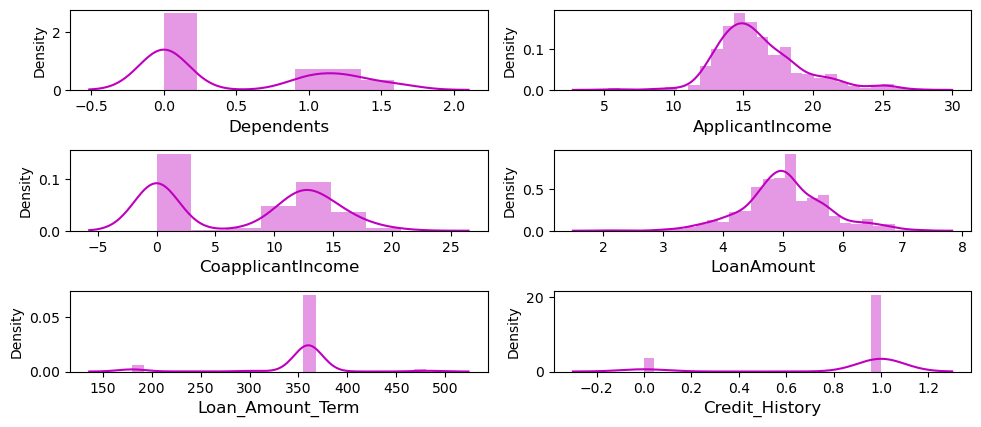

In [57]:
#lets check again how the data hase been distributed in numerical columns
plt.figure(figsize=(10, 18))  
plotnumber = 1
for col in numerical_cols:
    if plotnumber <= 26:
        plt.subplot(13, 2, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize=12)
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [58]:
# Encode categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))


df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,18.017473,0.000000,5.039684,360.0,1.0,2.0,1.0
1,1.0,1.0,1.000000,0.0,0.0,16.610522,11.467457,5.039684,360.0,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,14.422496,0.000000,4.041240,360.0,1.0,2.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,13.720654,13.310098,4.932424,360.0,1.0,2.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,18.171206,0.000000,5.204828,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,14.260431,0.000000,4.140818,360.0,1.0,0.0,1.0
610,1.0,1.0,1.587401,0.0,0.0,16.013010,0.000000,3.419952,180.0,1.0,0.0,1.0
611,1.0,1.0,1.000000,0.0,0.0,20.059821,6.214465,6.324704,360.0,1.0,2.0,1.0
612,1.0,1.0,1.259921,0.0,0.0,19.646281,0.000000,5.718479,360.0,1.0,2.0,1.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    float64
 1   Married            577 non-null    float64
 2   Dependents         577 non-null    float64
 3   Education          577 non-null    float64
 4   Self_Employed      577 non-null    float64
 5   ApplicantIncome    577 non-null    float64
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    float64
 11  Loan_Status        577 non-null    float64
dtypes: float64(12)
memory usage: 58.6 KB


In [60]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.489667,0.227036,0.126516,16.134910,7.419133,5.039828,348.041594,0.850953,1.031196,0.689775
std,0.388993,0.477411,0.612835,0.419280,0.332719,3.025241,6.790619,0.696289,51.845909,0.356444,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.313293,0.000000,2.080084,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,14.149753,0.000000,4.641589,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,15.536163,10.786517,5.039684,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,17.685909,13.109528,5.428835,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.587401,1.000000,1.000000,27.442635,20.785419,7.243156,480.000000,1.000000,2.000000,1.000000


In [61]:
# check correlation 
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.184982,0.045696,-0.006207,0.049555,0.230714,0.172138,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.346001,0.024817,-0.015779,-0.018391,0.320626,0.181788,-0.127348,0.019308,0.010595,0.089026
Dependents,0.184982,0.346001,1.000000,0.062940,0.067245,0.105693,0.005050,0.135796,-0.103641,-0.017697,0.033069,0.015917
Education,0.045696,0.024817,0.062940,1.000000,-0.007139,-0.178728,0.030281,-0.128826,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.067245,-0.007139,1.000000,0.230846,-0.078584,0.117273,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.049555,-0.018391,0.105693,-0.178728,0.230846,1.000000,-0.343626,0.440215,-0.064846,0.033597,-0.012177,-0.004722
CoapplicantIncome,0.230714,0.320626,0.005050,0.030281,-0.078584,-0.343626,1.000000,0.231598,-0.012575,0.001735,-0.081866,0.071908
LoanAmount,0.172138,0.181788,0.135796,-0.128826,0.117273,0.440215,0.231598,1.000000,0.048975,-0.003557,-0.098000,-0.023597
Loan_Amount_Term,-0.104983,-0.127348,-0.103641,-0.090523,-0.032914,-0.064846,-0.012575,0.048975,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.017697,-0.075217,-0.016390,0.033597,0.001735,-0.003557,0.027392,1.000000,-0.008121,0.560936


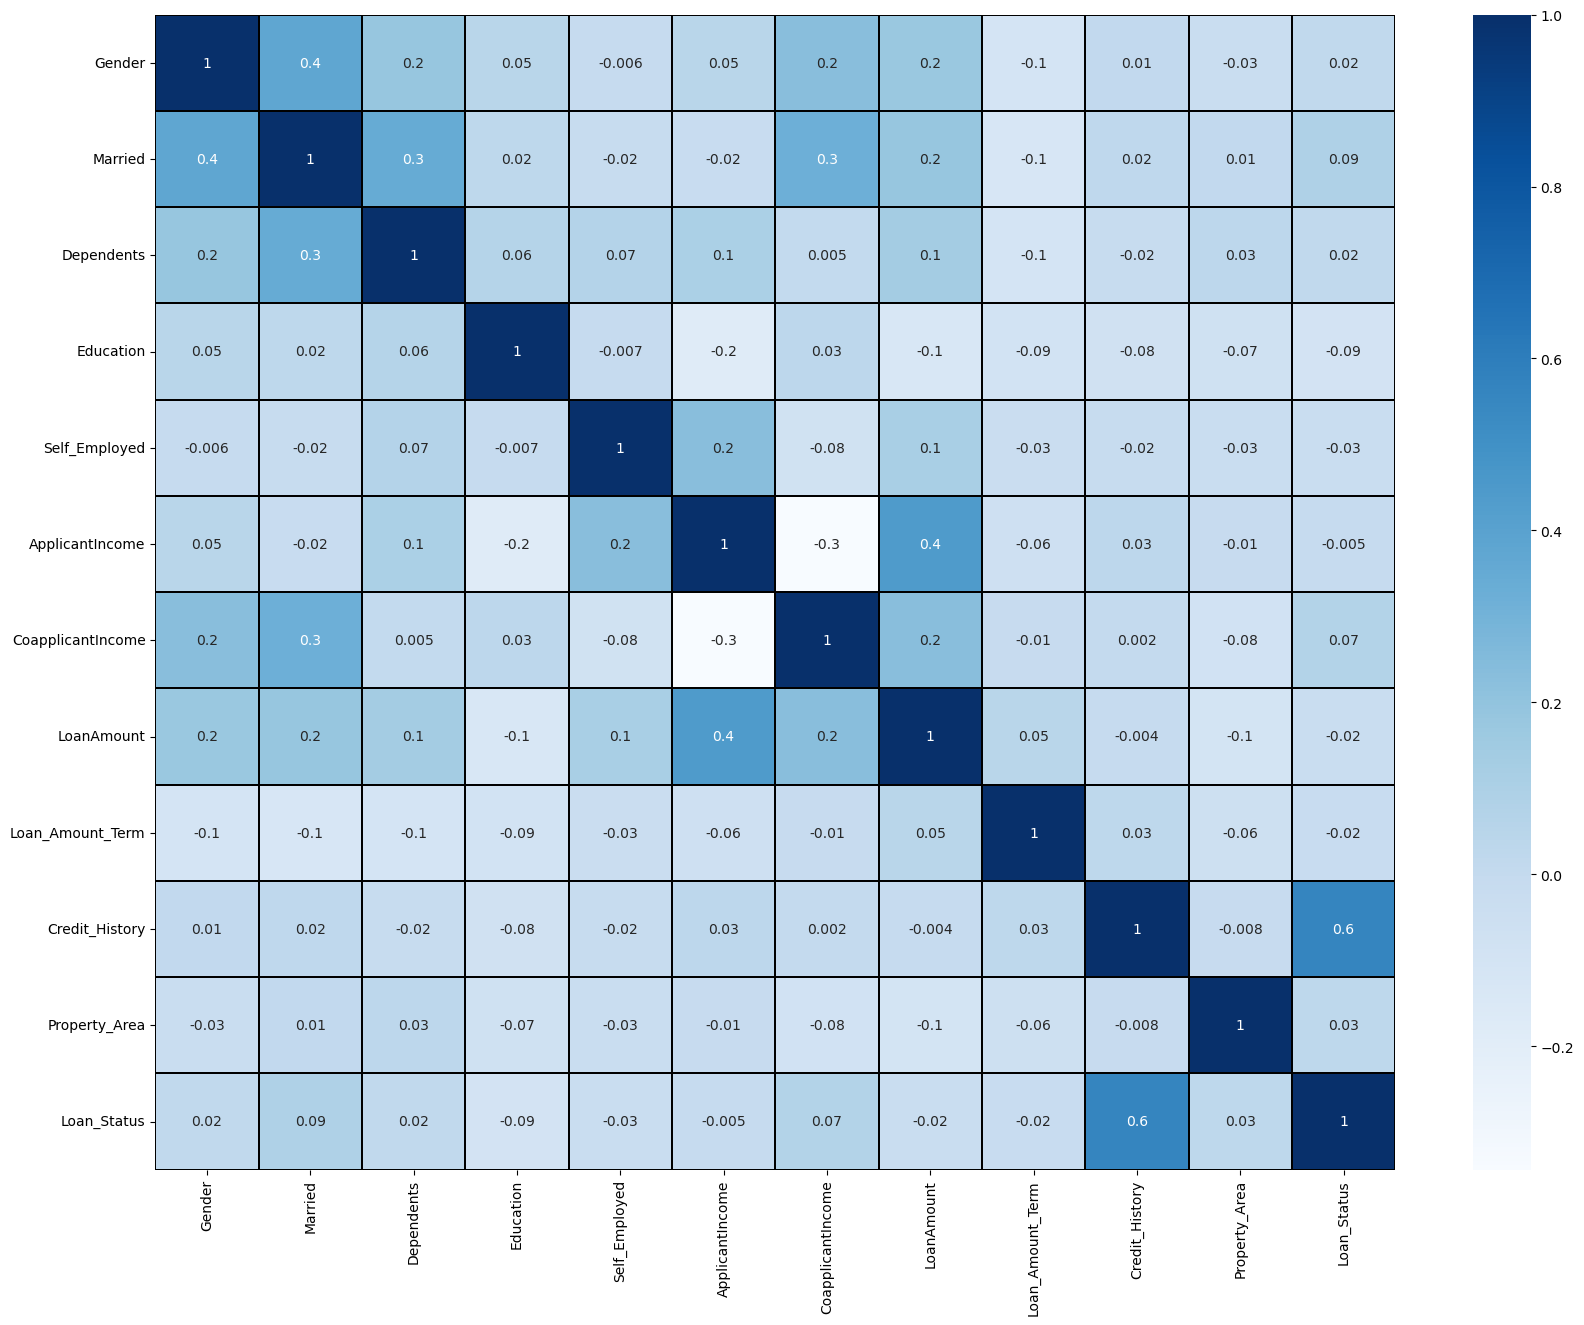

In [62]:
# Visualizing the correlation by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()

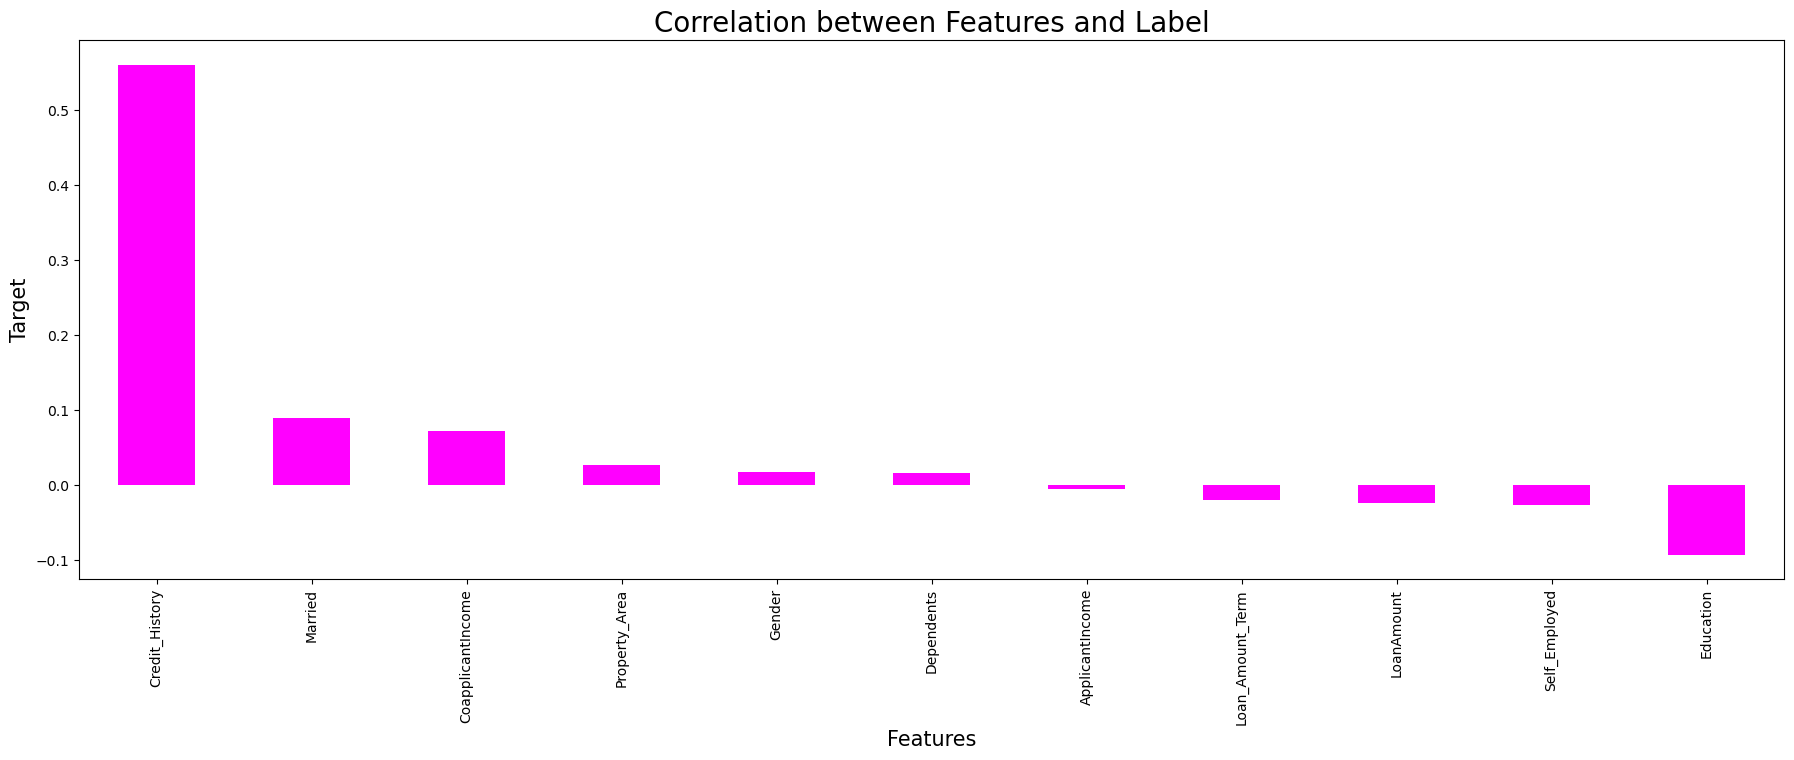

In [64]:
#visulaizing the correlation  between label and features using bar plot 
plt.figure(figsize=(22, 7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='magenta')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between Features and Label', fontsize=20)
plt.show()

In [65]:
#Separating features and label
x = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [66]:
#Feature Scalling using standard scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.799713,-0.541961,-0.380580,0.622825,-1.093504,-0.000207,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.833463,-0.541961,-0.380580,0.157351,0.596681,-0.000207,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.799713,-0.541961,2.627567,-0.566533,-1.093504,-1.435403,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.799713,1.845150,-0.380580,-0.798730,0.868268,-0.154386,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.799713,-0.541961,-0.380580,0.673686,-1.093504,0.237176,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.799713,-0.541961,-0.380580,-0.620151,-1.093504,-1.292267,0.230853,0.418513,-1.306522
573,0.477137,0.733939,1.792793,-0.541961,-0.380580,-0.040329,-1.093504,-2.328463,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.833463,-0.541961,-0.380580,1.298514,-0.177556,1.846922,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.257960,-0.541961,-0.380580,1.161699,-1.093504,0.975515,0.230853,0.418513,1.227472


In [67]:
#checking variance inflation factor (vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor

Vif = pd.DataFrame()
Vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
Vif['Features'] = x.columns
Vif

,VIF Values,Features
0,1.217130,Gender
1,1.415466,Married
2,1.186594,Dependents
3,1.070554,Education
4,1.062752,Self_Employed
5,1.803207,ApplicantIncome
6,1.600649,CoapplicantIncome
7,1.622014,LoanAmount
8,1.058762,Loan_Amount_Term
9,1.009861,Credit_History


In [68]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [69]:
#Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x, y = SM.fit_resample(x, y)

In [70]:
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

Modelling

In [71]:
#import liabraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [72]:
#Finding the best random state
maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8828451882845189 at random_state 46


In [73]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRs)

In [74]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [75]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
PredRFC = RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))

0.8577405857740585
[[ 95  20]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       115
         1.0       0.85      0.89      0.87       124

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



In [76]:
# Logistic Regression Classifier
LRC = LogisticRegression()
LRC.fit(x_train, y_train)
PredLRC = LRC.predict(x_test)
print(accuracy_score(y_test,PredLRC))
print(confusion_matrix(y_test,PredLRC))
print(classification_report(y_test,PredLRC))

0.7322175732217573
[[ 65  50]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.82      0.57      0.67       115
         1.0       0.69      0.89      0.77       124

    accuracy                           0.73       239
   macro avg       0.76      0.73      0.72       239
weighted avg       0.75      0.73      0.72       239



In [77]:
# Support Vector Machine Classifier
SVM = SVC()
SVM.fit(x_train, y_train)
PredSVM = SVM.predict(x_test)
print(accuracy_score(y_test,PredSVM))
print(confusion_matrix(y_test,PredSVM))
print(classification_report(y_test,PredSVM))

0.7824267782426778
[[ 77  38]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       115
         1.0       0.74      0.89      0.81       124

    accuracy                           0.78       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.78      0.78       239



In [78]:
# Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
PredGB = GB.predict(x_test)
print(accuracy_score(y_test,PredGB))
print(confusion_matrix(y_test,PredGB))
print(classification_report(y_test,PredGB))

0.8368200836820083
[[ 86  29]
 [ 10 114]]
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82       115
         1.0       0.80      0.92      0.85       124

    accuracy                           0.84       239
   macro avg       0.85      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239



In [79]:
# Ada Boost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
PredABC = ABC.predict(x_test)
print(accuracy_score(y_test,PredABC))
print(confusion_matrix(y_test,PredABC))
print(classification_report(y_test,PredABC))

0.7782426778242678
[[ 82  33]
 [ 20 104]]
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.76       115
         1.0       0.76      0.84      0.80       124

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [80]:
#Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
PredBC = BC.predict(x_test)
print(accuracy_score(y_test,PredBC))
print(confusion_matrix(y_test,PredBC))
print(classification_report(y_test,PredBC))

0.799163179916318
[[94 21]
 [27 97]]
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       115
         1.0       0.82      0.78      0.80       124

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



In [81]:
#Extra Trees Classifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
PredET = ET.predict(x_test)
print(accuracy_score(y_test,PredET))
print(confusion_matrix(y_test,PredET))
print(classification_report(y_test,PredET))

0.8410041841004184
[[ 96  19]
 [ 19 105]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       115
         1.0       0.85      0.85      0.85       124

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



CROSS VALIDATION SCORE

In [82]:
Score = cross_val_score(RFC,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredRFC)- Score.mean())

[0.75625    0.79245283 0.87421384 0.8490566  0.9245283 ]
0.8393003144654088
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.01844027130864978


In [83]:
Score = cross_val_score(LRC,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredLRC)- Score.mean()) 

[0.6875     0.75471698 0.81132075 0.62893082 0.71069182]
0.7186320754716982
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.013585497750059128


In [84]:
Score = cross_val_score(SVM,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredSVM)- Score.mean())

[0.725      0.72327044 0.79874214 0.6918239  0.80503145]
0.7487735849056604
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.03365319333701744


In [85]:
Score = cross_val_score(GB,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredGB)- Score.mean()) 

[0.6875     0.71698113 0.83018868 0.80503145 0.86163522]
0.7802672955974843
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.05655278808452402


In [86]:
Score = cross_val_score(ABC,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredABC)- Score.mean())

[0.66875    0.71069182 0.76100629 0.77987421 0.79245283]
0.742555031446541
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.03568764637772681


In [87]:
Score = cross_val_score(BC,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredBC)- Score.mean())

[0.7625     0.74213836 0.8427673  0.79245283 0.80503145]
0.7889779874213836
Diffrence between Accuracy Score and Cross_Validation_Score is- 0.010185192494934436


In [88]:
Score = cross_val_score(ET,x,y)
print(Score)
print(Score.mean())
print("Diffrence between Accuracy Score and Cross_Validation_Score is-",accuracy_score(y_test,PredET)- Score.mean())

[0.775      0.79874214 0.88679245 0.86792453 0.89937107]
0.8455660377358492
Diffrence between Accuracy Score and Cross_Validation_Score is- -0.004561853635430713


HyperparameterTuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state': [10, 50, 1000]
}

In [91]:
GSV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
GSV.fit(x_train, y_train)
best_params = GSV.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 1000}


In [94]:
Final_Model = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=2, n_estimators=200, random_state=1000)
Final_Model.fit(x_train, y_train)

pred = Final_Model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc*100)

Accuracy: 86.19246861924687


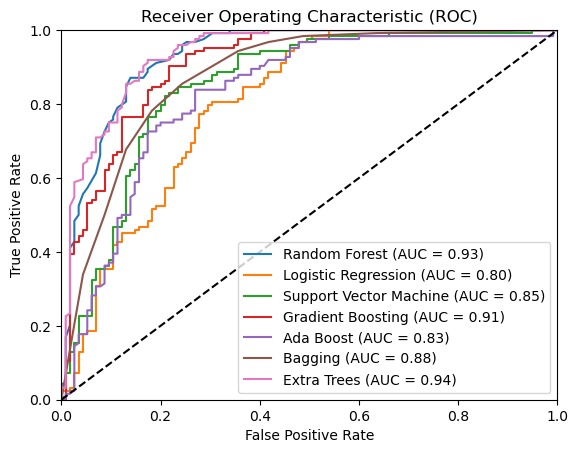

AUC Scores:


<function print>

In [95]:
#plotting Roc and compare Auc for all the models used
from sklearn.metrics import roc_auc_score, roc_curve

# Random Forest Classifier
y_pred_prob_RFC = RFC.predict_proba(x_test)[:, 1]
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, y_pred_prob_RFC)
roc_auc_RFC = roc_auc_score(y_test, y_pred_prob_RFC)
plt.plot(fpr_RFC, tpr_RFC, label='Random Forest (AUC = %0.2f)' % roc_auc_RFC)

# Logistic Regression Classifier
y_pred_prob_LRC = LRC.predict_proba(x_test)[:, 1]
fpr_LRC, tpr_LRC, thresholds_LRC = roc_curve(y_test, y_pred_prob_LRC)
roc_auc_LRC = roc_auc_score(y_test, y_pred_prob_LRC)
plt.plot(fpr_LRC, tpr_LRC, label='Logistic Regression (AUC = %0.2f)' % roc_auc_LRC)

# Support Vector Machine Classifier
y_pred_prob_SVM = SVM.decision_function(x_test)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_pred_prob_SVM)
roc_auc_SVM = roc_auc_score(y_test, y_pred_prob_SVM)
plt.plot(fpr_SVM, tpr_SVM, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_SVM)

# Gradient Boosting Classifier
y_pred_prob_GB = GB.predict_proba(x_test)[:, 1]
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_test, y_pred_prob_GB)
roc_auc_GB = roc_auc_score(y_test, y_pred_prob_GB)
plt.plot(fpr_GB, tpr_GB, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_GB)

# Ada Boost Classifier
y_pred_prob_ABC = ABC.predict_proba(x_test)[:, 1]
fpr_ABC, tpr_ABC, thresholds_ABC = roc_curve(y_test, y_pred_prob_ABC)
roc_auc_ABC = roc_auc_score(y_test, y_pred_prob_ABC)
plt.plot(fpr_ABC, tpr_ABC, label='Ada Boost (AUC = %0.2f)' % roc_auc_ABC)

# Bagging Classifier
y_pred_prob_BC = BC.predict_proba(x_test)[:, 1]
fpr_BC, tpr_BC, thresholds_BC = roc_curve(y_test, y_pred_prob_BC)
roc_auc_BC = roc_auc_score(y_test, y_pred_prob_BC)
plt.plot(fpr_BC, tpr_BC, label='Bagging (AUC = %0.2f)' % roc_auc_BC)

# Extra Trees Classifier (Final Model)
y_pred_prob_Final = Final_Model.predict_proba(x_test)[:, 1]
fpr_Final, tpr_Final, thresholds_Final = roc_curve(y_test, y_pred_prob_Final)
roc_auc_Final = roc_auc_score(y_test, y_pred_prob_Final)
plt.plot(fpr_Final, tpr_Final, label='Extra Trees (AUC = %0.2f)' % roc_auc_Final)

# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# AUC Scores
print('AUC Scores:')
print

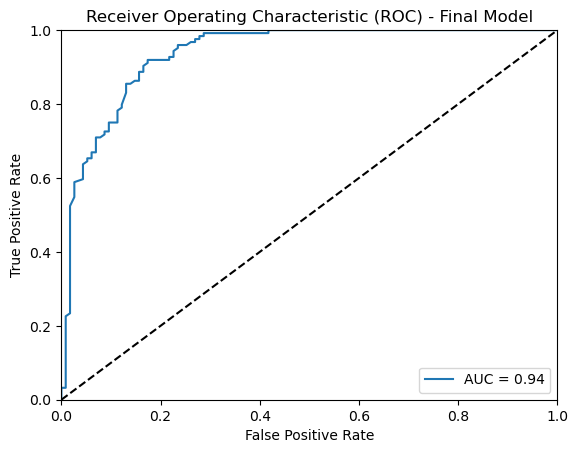

AUC Score: 0.94


In [96]:
#lets check the Auc for the best model after hyper parameter tuning
# Calculate predicted probabilities
y_pred_prob = Final_Model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Final Model')
plt.legend(['AUC = %0.2f' % roc_auc])
plt.show()

# Print AUC score
print('AUC Score: %0.2f' % roc_auc)

In [97]:
#Saving the model using joblib
import joblib
joblib.dump(Final_Model, "Loan_Status_Prediction.pkl")

['Loan_Status_Prediction.pkl']

In [98]:
#lets load the saved model and get the predictions
Model = joblib.load("Loan_Status_Prediction.pkl")

#prediction
prediction = Model.predict(x_test)
prediction

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1.

In [99]:
a = np.array(y_test)
df = pd.DataFrame()
df ["predicted"] = prediction
df ["original"] = a
df

,predicted,original
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
234,0.0,1.0
235,1.0,1.0
236,1.0,1.0
237,0.0,0.0
